# **Cats and Dogs Classification**
*Classifying whether a given image is of a cat or a dog using Convolution Neural Network (CNN)*

*Dataset Link: https://www.kaggle.com/tongpython/cat-and-dog*

## Part 1 - Data Preprocessing

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing tensorflow libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Importing Training set
training_set = train_datagen.flow_from_directory('./Dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [4]:
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test set
test_set = test_datagen.flow_from_directory('./Dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2023 images belonging to 2 classes.


## Part 2 - Building the CNN

In [5]:
# Initialising the CNN
cnn = Sequential()
# Step 1 - Add Convolution Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# Step 2 - Add Pooling Layer
cnn.add(MaxPool2D(pool_size=2, strides=2))
# Add second onvolutional layer with pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
# Step 3 - Add Flattening Layer
cnn.add(Flatten())
# Step 4 - Add Full Connected Layer
cnn.add(Dense(units=128, activation='relu'))
# Step 5 - Add Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Part 3 - Training the CNN

In [7]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Training the CNN on the Training set and evaluating it on the Test set
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
251/251 [==============================] - 97s 385ms/step - loss: 0.6777 - accuracy: 0.5714 - val_loss: 0.6607 - val_accuracy: 0.6130
Epoch 2/25
251/251 [==============================] - 90s 359ms/step - loss: 0.6446 - accuracy: 0.6322 - val_loss: 0.6252 - val_accuracy: 0.6673
Epoch 3/25
251/251 [==============================] - 81s 323ms/step - loss: 0.6000 - accuracy: 0.6788 - val_loss: 0.7040 - val_accuracy: 0.6228
Epoch 4/25
251/251 [==============================] - 82s 327ms/step - loss: 0.5639 - accuracy: 0.7086 - val_loss: 0.6187 - val_accuracy: 0.6980
Epoch 5/25
251/251 [==============================] - 81s 324ms/step - loss: 0.5296 - accuracy: 0.7358 - val_loss: 0.5432 - val_accuracy: 0.7449
Epoch 6/25
251/251 [==============================] - 82s 326ms/step - loss: 0.4898 - accuracy: 0.7620 - val_loss: 0.5036 - val_accuracy: 0.7617
Epoch 7/25
251/251 [==============================] - 84s 334ms/step - loss: 0.4719 - accuracy: 0.7661 - val_loss: 0.5013 - val_ac

## Part 4 - Model Evaluation

In [9]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


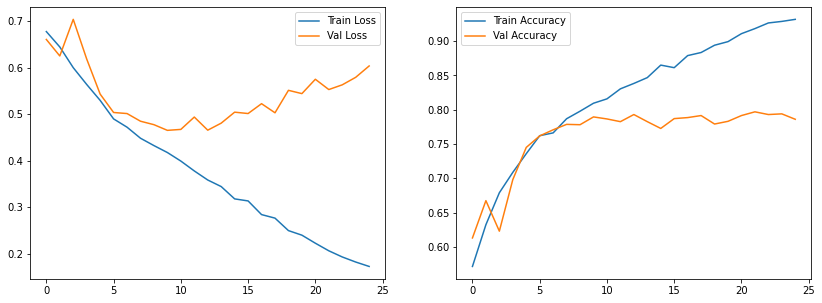

In [11]:
# Summarize history for accuracy

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(model_history.history['loss'], label='Train Loss')
ax1.plot(model_history.history['val_loss'], label='Val Loss')

ax1.legend() 

ax2.plot(model_history.history['accuracy'], label='Train Accuracy')
ax2.plot(model_history.history['val_accuracy'], label='Val Accuracy')

ax2.legend()

## Part 5 - Making Predictions

### Prediction 1

*Predicting the following image:*

<img src='https://drive.google.com/uc?id=1eTA9tOoKb0OJwVUhQKB68QiuzWlAGUQA' width='400px' height='300px'/>

In [12]:
test_image = image.load_img('./Dataset/Prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Cat's image.


### Prediction 2

*Predicting the following image:*

<img src="https://drive.google.com/uc?id=1FxykYvoG5x2ob0uZClJAMv6006fz3Unf" width="450px" height="300px"/>

In [13]:
test_image = image.load_img('./Dataset/Prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.


### Prediction 3

*Predicting the following image:*

<img src="https://drive.google.com/uc?id=1heVtXw_DN4iNhe17sWYbXFz4OEryo0l9" width="450px" height="300px"/>

In [14]:
test_image = image.load_img('./Dataset/Prediction/cat_or_dog_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.


### Prediction 4

*Predicting the following image:*

<img src="https://drive.google.com/uc?id=1zJ8yiKX1MFTYvGdMfWCPOG351E5hyEEX" width="450px" height="400px"/>

In [15]:
test_image = image.load_img('./Dataset/Prediction/cat_or_dog_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Cat's image.
